In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
df=pd.read_csv('C:/Users/William Wallace/Desktop/carpeta visual/semana_9/IMDBDataset.csv')
print (df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
review =[]
sentences =list(df['review'])
for sen in sentences:
    review.append(sen)

labels = df['sentiment']
labels =np.array(list (map(lambda x:1 if x=="positive" else 0,labels)))


train_sentences,test_sentences,train_labels,test_labels = train_test_split(review,labels,test_size=0.20)

vocab_size =1000
max_length=120
embedding_dim=16
trunc_type="post"
padding_type='post'
oov_tok="<OOV>"

# Genera el diccionario de tokens
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index


#generacion secuencia de tokenizadas

secuencias = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(secuencias,maxlen=max_length,truncating=trunc_type)
#rellena las secuencias a una longitud uniforme


test_secuencias=tokenizer.texts_to_sequences(test_sentences)
test_padded = keras.preprocessing.sequence.pad_sequences (test_secuencias,maxlen=max_length,truncating=trunc_type)

In [ ]:
#modelos
model1 =keras.Sequential([
keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
keras.layers.Flatten(),
keras.layers.Dense(64,activation='relu'),
keras.layers.Dense(1,activation='sigmoid')
])

model2 = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(64,return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')

])

#con 6 se tiene 0,82 de scor






C:\Users\William Wallace\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
#resumen model01
#resumen del modelo2
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()

#entrenamiento modelo2

#entrenamiento del modelo
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6712 - loss: 0.5721 - val_accuracy: 0.7843 - val_loss: 0.4493
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8287 - loss: 0.3814 - val_accuracy: 0.8041 - val_loss: 0.4230
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8674 - loss: 0.3072 - val_accuracy: 0.7909 - val_loss: 0.4642
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9029 - loss: 0.2392 - val_accuracy: 0.7728 - val_loss: 0.5399
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9364 - loss: 0.1721 - val_accuracy: 0.7726 - val_loss: 0.6270
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9618 - loss: 0.1142 - val_accuracy: 0.7657 - val_loss: 0.7751
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9823 - loss: 0.0663 - val_accuracy: 0.7630 - val_loss: 1.0167
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9903 - loss: 0.0411 - 

<Axes: >

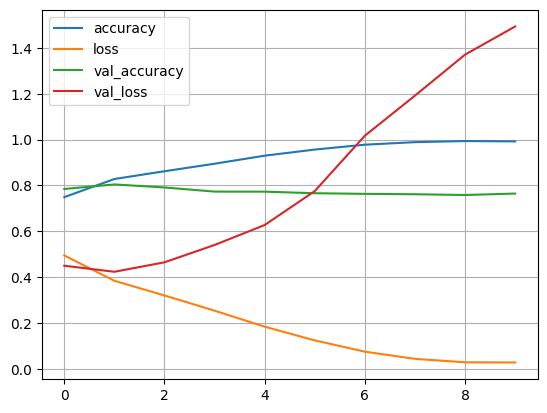

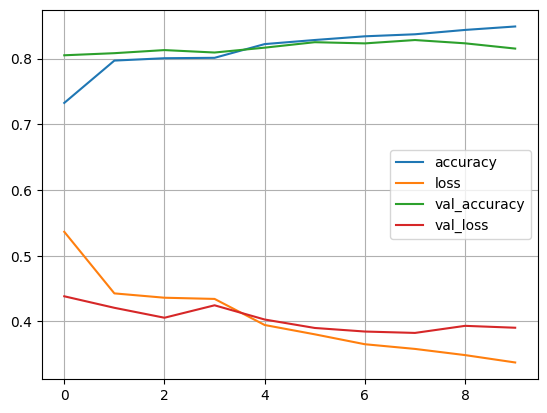

In [ ]:
#entrenamiento modelo1
num_epocas= 10

history1 = model1.fit(
padded,train_labels,epochs=num_epocas,validation_data=(test_padded,test_labels)
)
#graficar model1
pd.DataFrame(history1.history).plot(grid=True)

#entrenamiento modelo2

history2 = model2.fit(
padded,train_labels,epochs=num_epocas,validation_data=(test_padded,test_labels)
)
#graficar model1
pd.DataFrame(history2.history).plot(grid=True)
#entrenamiento modelo2


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


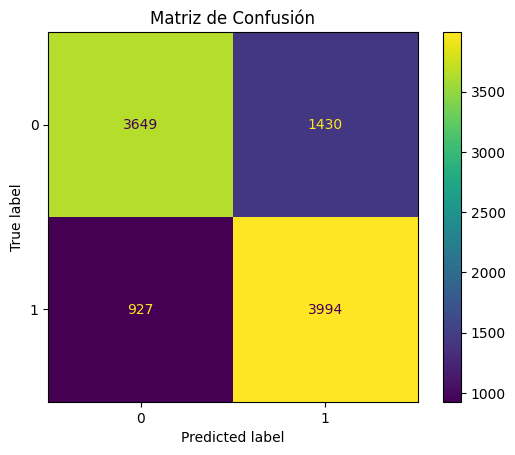

F1 Score: 0.7721604639922668
AUC-ROC: 0.8462279323410296


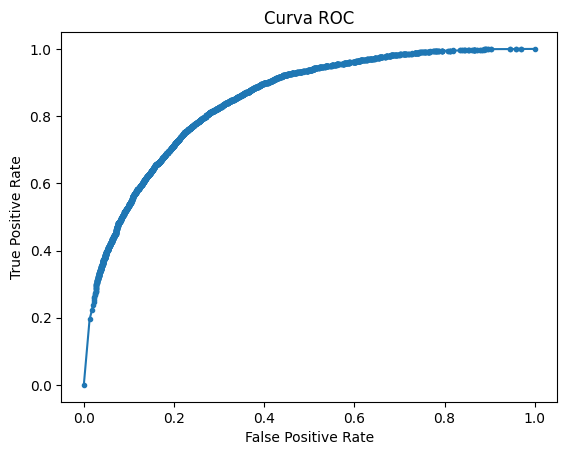

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Hacer predicciones sobre el conjunto de datos de prueba
y_pred_prob = model1.predict(test_padded)
y_pred_classes = (y_pred_prob > 0.5).astype("int32")  # Convertir predicciones a clases binarias

# Calcular la matriz de confusión
cm = confusion_matrix(test_labels, y_pred_classes)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión")
plt.show()

# Calcular el F1 score
f1 = f1_score(test_labels, y_pred_classes)
print(f"F1 Score: {f1}")

# Calcular el AUC-ROC
auc = roc_auc_score(test_labels, y_pred_prob)
print(f"AUC-ROC: {auc}")

# Mostrar la curva ROC
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_labels, y_pred_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step


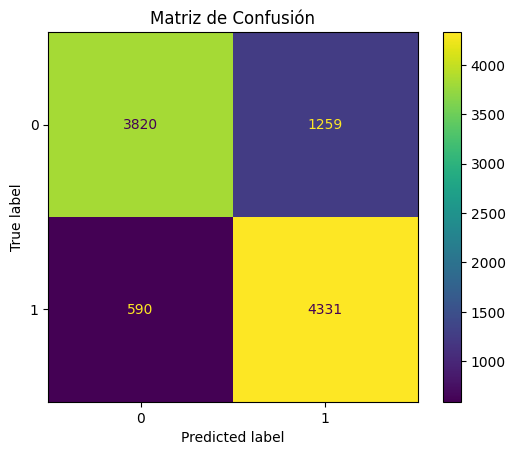

F1 Score: 0.8240890495671201
AUC-ROC: 0.9081992028489991


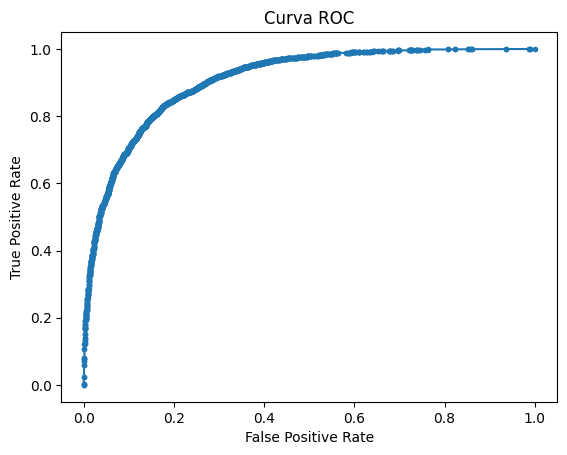

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Hacer predicciones sobre el conjunto de datos de prueba
y_pred_prob = model2.predict(test_padded)
y_pred_classes = (y_pred_prob > 0.5).astype("int32")  # Convertir predicciones a clases binarias

# Calcular la matriz de confusión
cm = confusion_matrix(test_labels, y_pred_classes)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión")
plt.show()

# Calcular el F1 score
f1 = f1_score(test_labels, y_pred_classes)
print(f"F1 Score: {f1}")

# Calcular el AUC-ROC
auc = roc_auc_score(test_labels, y_pred_prob)
print(f"AUC-ROC: {auc}")

# Mostrar la curva ROC
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_labels, y_pred_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()

1. ¿Qué tipo de modelo de red neuronal se construye en el código?

R. Una red neuronal recurrente LSTM (Long Short-Term Memory)

2. ¿Cuál es la función de activación utilizada en la capa de salida y por qué se elige esta función para
este problema?

R.sigmoid, es adecuada para problemas de clasicación binaria.

3. ¿Cuál es la diferencia entre una capa LSTM bidireccional y una capa LSTM unidireccional?

R.  la capa LSTM bidireccional puede capturar dependencias tanto hacia adelante como hacia atrás en la secuencia, mientras que la unidireccional solo captura dependencias hacia adelante. Esto puede ser útil para tareas donde el contexto futuro es tan importante como el pasado.

4. ¿Qué signican los parámetros return_sequences=True en la primera capa LSTM bidireccional?

R. hace que la capa devuelva la secuencia completa de salidas en lugar de solo la última salida.

5. ¿Qué función de pérdida se utiliza en el modelo y por qué es adecuada para problemas de clasificación binaria?

R. loss='binary_crossentropy', se usa en modelos de clasificación binaria en Keras para calcular la pérdida entre las predicciones del modelo y las etiquetas reales. Es una función de pérdida adecuada para problemas donde cada muestra de entrenamiento pertenece a una de dos clases posibles.

6. ¿Qué métrica se utiliza para evaluar el rendimiento del modelo durante el entrenamiento?

R. metrics=['accuracy'],  La precisión (accuracy) es una métrica que mide la proporción de predicciones correctas en comparación con el número total de predicciones

7. ¿Por qué se utilizan dos capas LSTM bidireccionales en el modelo?

R.Al apilar dos capas bidireccionales, el modelo puede aprender representaciones más complejas y captar relaciones de largo alcance en los datos.

8. ¿Qué hace la capa de embedding en el modelo y por qué es necesaria?

R.convierte índices enteros (que representan palabras o tokens) en vectores densos de dimensión fija.

